<h3>Project Group Members:</h3>
<ul>
  <li>Rudradityo Saha (16BCE1062)</li>
  <li>Vangaveeti Bhagavan Kumar (16BCE1353)</li>
  </ul>


Slot: C1

<h3>Dataset:</h3>
<ul>
  <li>https://github.com/mwitiderrick/simple-recommender-</li>
  </ul>

<h3>Code:</h3>

In [0]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving u.data to u (1).data


In [0]:
df = pd.read_csv('u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
from google.colab import files
uploaded = files.upload()

Saving Movie_Id_Titles to Movie_Id_Titles (1)


In [6]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [7]:
df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


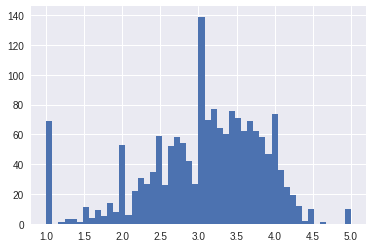

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

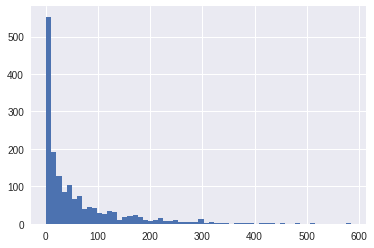

In [12]:
ratings['number_of_ratings'].hist(bins=60)

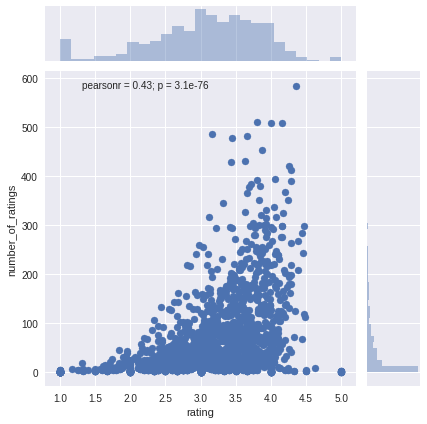

In [13]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [14]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer = imputer.fit(movie_matrix)
imputed_data = imputer.transform(movie_matrix.values)
imputed_data
imputed_movie_matrix=pd.DataFrame(imputed_data)
imputed_movie_matrix

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663
0,2.333333,2.6,2.908257,4.344,3.02439,3.225806,3.5,3.969112,1.0,4.050847,...,1.0,3.285714,3.0,3.945,3.207921,2.772727,3.341463,2.166667,3.444444,3.0
1,2.333333,2.6,2.000000,5.000,3.02439,3.225806,3.0,4.000000,1.0,4.050847,...,1.0,3.285714,3.0,5.000,3.000000,2.772727,3.341463,2.166667,4.000000,3.0
2,2.333333,2.6,2.908257,4.344,3.02439,3.225806,3.5,3.969112,1.0,4.050847,...,1.0,3.285714,3.0,3.945,3.207921,2.772727,3.341463,2.166667,3.444444,3.0
3,2.333333,2.6,2.908257,4.344,2.00000,3.225806,3.5,3.969112,1.0,4.050847,...,1.0,3.285714,3.0,3.945,3.207921,2.772727,3.341463,2.166667,3.444444,3.0
4,2.333333,2.6,2.908257,4.344,3.02439,3.225806,3.5,3.969112,1.0,4.050847,...,1.0,3.285714,3.0,3.945,3.207921,2.772727,3.341463,2.166667,3.444444,3.0
5,2.333333,2.6,2.000000,4.344,3.02439,3.225806,3.5,4.000000,1.0,4.050847,...,1.0,3.285714,3.0,4.000,3.207921,2.772727,3.341463,2.166667,4.000000,3.0
6,2.333333,2.6,2.908257,4.000,3.02439,3.225806,3.5,5.000000,1.0,4.050847,...,1.0,3.285714,3.0,4.000,3.207921,2.772727,3.341463,2.166667,3.444444,3.0
7,2.333333,2.6,2.908257,4.000,3.02439,3.225806,5.0,5.000000,1.0,4.000000,...,1.0,3.285714,3.0,5.000,3.000000,2.772727,3.000000,2.166667,3.444444,3.0
8,2.333333,2.6,2.908257,4.344,3.02439,3.225806,3.5,3.969112,1.0,4.050847,...,1.0,3.285714,3.0,3.945,3.207921,2.772727,3.341463,2.166667,3.444444,3.0
9,2.333333,2.6,2.908257,4.344,3.02439,3.225806,3.5,3.969112,1.0,4.000000,...,1.0,3.285714,3.0,3.945,3.207921,2.772727,3.341463,2.166667,3.444444,3.0


In [16]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


Let’s assume that a user has watched Air Force One (1997) and Contact (1997). We would like like to recommend movies to this user based on this watching history. The goal is to look for movies that are similar to Contact (1997) and Air Force One (1997 which we shall recommend to this user.

In [0]:
# AFO_user_rating = imputed_movie_matrix['Air Force One (1997)']
AFO_user_rating = imputed_movie_matrix[300]


# contact_user_rating = imputed_movie_matrix['Contact (1997)']
contact_user_rating = imputed_movie_matrix[222]


In [18]:
AFO_user_rating.head()


0    3.581395
1    3.581395
2    3.581395
3    3.581395
4    3.581395
Name: 300, dtype: float64

In [19]:
contact_user_rating.head()

0    3.857143
1    3.857143
2    3.857143
3    3.857143
4    3.857143
Name: 222, dtype: float64

In [0]:
similar_to_air_force_one=imputed_movie_matrix.corrwith(AFO_user_rating)

In [21]:
similar_to_air_force_one.head()

0    0.004852
1   -0.073593
2    0.145739
3    0.099094
4    0.010615
dtype: float64

Correlation between Contact (1997) ratings and the rest of the movies ratings

In [22]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)
similar_to_contact.head()

title
'Til There Was You (1997)         NaN
1-900 (1994)                 0.589768
101 Dalmatians (1996)        0.078560
12 Angry Men (1957)          0.161691
187 (1997)                   0.093012
dtype: float64

In [23]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
title,
1-900 (1994),0.589768
101 Dalmatians (1996),0.078560
12 Angry Men (1957),0.161691
187 (1997),0.093012
2 Days in the Valley (1996),0.049460


In [24]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
0,0.004852
1,-0.073593
2,0.145739
3,0.099094
4,0.010615


These two dataframes above show us the movies that are most similar to Contact (1997) and Air Force One (1997) movies respectively.

In [25]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()

,Correlation,number_of_ratings
title,,
1-900 (1994),0.589768,5
101 Dalmatians (1996),0.078560,109
12 Angry Men (1957),0.161691,125
187 (1997),0.093012,41
2 Days in the Valley (1996),0.049460,93


In [26]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings


Recommendations for Movie 'Air Force One'

In [27]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
title,,
What's Eating Gilbert Grape (1993),0.320942,115
"Remains of the Day, The (1993)",0.312650,150
Unforgiven (1992),0.302150,182
Bound (1996),0.298905,129
"Sex, Lies, and Videotape (1989)",0.278383,101
"Boot, Das (1981)",0.270636,201
Bram Stoker's Dracula (1992),0.269475,120
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.262562,111
"Wrong Trousers, The (1993)",0.256691,118


Recommendations for Movie 'Contact'

<h3>Reference:</h3>
<p>https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d</p>